In [1]:
import pandas as pd 
import pandas as np
import os
os.chdir('/home/yupaporn/codes/USAI')
data_train = pd.read_csv("predict_all_call.csv") 

In [2]:
data_train

,Unnamed: 0,2Actual,3Predicted,4Class_prob,path
0,0,Normal,Normal,0.998357,/media/tohn/HDD/VISION_dataset/USAI/Prelim. Im...
1,1,Normal,Normal,0.999896,/media/tohn/HDD/VISION_dataset/USAI/Prelim. Im...
2,2,Normal,Normal,0.999845,/media/tohn/HDD/VISION_dataset/USAI/Prelim. Im...
3,3,Normal,Normal,0.999996,/media/tohn/HDD/VISION_dataset/USAI/Prelim. Im...
4,4,Normal,Normal,0.999990,/media/tohn/HDD/VISION_dataset/USAI/Prelim. Im...
5,5,Normal,Normal,0.999821,/media/tohn/HDD/VISION_dataset/USAI/Prelim. Im...
6,6,Normal,Normal,0.999976,/media/tohn/HDD/VISION_dataset/USAI/Prelim. Im...
7,7,Normal,Normal,0.999979,/media/tohn/HDD/VISION_dataset/USAI/Prelim. Im...
8,8,Normal,Normal,0.999688,/media/tohn/HDD/VISION_dataset/USAI/Prelim. Im...
9,9,Normal,Normal,0.992386,/media/tohn/HDD/VISION_dataset/USAI/Prelim. Im...


# Visualization

### Performance Scores

In [3]:
act = data_train['2Actual'].array
pred = data_train['3Predicted'].array

In [4]:
#class
classes =['Abnormal', 'Normal']

In [5]:
#accuracy
import numpy as np
from sklearn.metrics import confusion_matrix
cmat = confusion_matrix(act, pred, classes)
print('Accuracy = {}%'.format((100.*np.trace(cmat))/(np.sum(cmat))))

Accuracy = 86.91358024691358%


/home/yupaporn/miniconda3/envs/eff/lib/python3.6/site-packages/sklearn/utils/validation.py:71: FutureWarning: Pass labels=['Abnormal', 'Normal'] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


In [6]:
#Precision, Recall, F1-Score
from sklearn.metrics import classification_report,confusion_matrix
# confusion_matrix(act, pred)
print(classification_report(act, pred))

              precision    recall  f1-score   support

    Abnormal       0.99      0.82      0.90       290
      Normal       0.69      0.98      0.81       115

    accuracy                           0.87       405
   macro avg       0.84      0.90      0.86       405
weighted avg       0.91      0.87      0.87       405



### Confusion matrix 

In [7]:
#confusion matrix
data = {'Predicted' : pred, 'Actual': act}
df = pd.DataFrame(data, columns=['Actual','Predicted'])
conf_mat = pd.crosstab(df['Predicted'],df['Actual'],rownames=['Predicted'],colnames=['Actual'])
conf_mat

Actual,Abnormal,Normal
Predicted,,
Abnormal,239,2
Normal,51,113


Text(44.5, 0.5, 'Predicted label')

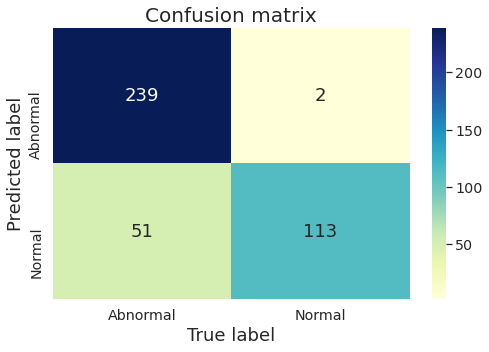

In [37]:
#seaborn
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
cm = confusion_matrix(act, pred)

import seaborn as sns
sns.set(font_scale=1.3)
fig, ax = plt.subplots(figsize=(8, 5))

ax = sns.heatmap(conf_mat, annot=True, fmt="d", cmap="YlGnBu",annot_kws={"size": 18}) #Blues,Oranges,Reds
ax.set_title('Confusion matrix',fontsize=20)
ax.set_xlabel('True label',fontsize=18)
ax.set_ylabel('Predicted label',fontsize=18)

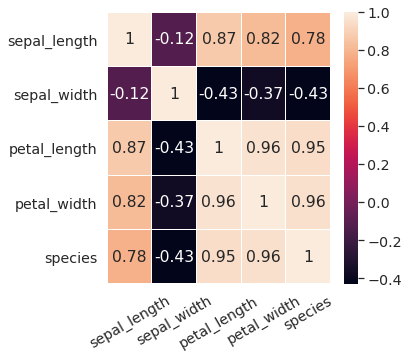

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#matplotlib inline

iris = sns.load_dataset('iris')

#iris2 = pd.get_dummies(iris)
#iris2.head(3)

species_mapping = {'setosa': 0, 'versicolor': 1, 'virginica': 2}
iris3 = iris.copy()
iris3['species'] = iris['species'].map(species_mapping)
iris3.head(3)

plt.figure(figsize = (5, 5))
sns.heatmap(iris3.corr(), annot = True, linewidths = 0.1, linecolor = 'white')
plt.xticks(rotation = 30)
plt.show()

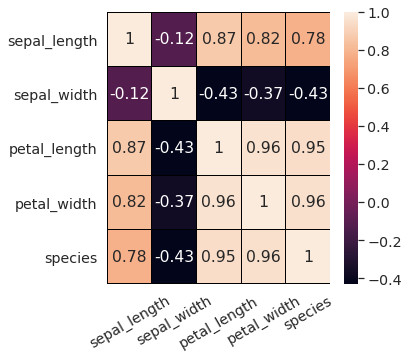

In [39]:
plt.figure(figsize = (5, 5))
sns.heatmap(iris3.corr(), annot = True, linewidths = 0.1, linecolor = 'black')
plt.xticks(rotation = 30)
plt.show()